In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("dataset/cleaned_data.csv")

In [42]:
df.head()

,Product URL,Product Name,Product Price,Rating,Number of reviews,Manufacturer,ASIN,product_name
0,https://www.amazon.in/Skybags-Brat-Black-Casua...,"Skybags Casual Backpack 28L, 2 Main Compartmen...",₹446,4.1 out of 5 stars,"13,311",VIP Industries Ltd,B08Z1HHHTD,skybag casual backpack main compartment bottle...
1,https://www.amazon.in/Number-Backpack-Compartm...,FUR JADEN Anti Theft Number Lock Backpack Bag ...,₹699,4.4 out of 5 stars,"15,425","FUR JADEN, Fur Jaden, 3C Jai Hind Bld, Dr AM R...",B09VTDMRY7,fur jaden anti theft number lock backpack bag ...
2,https://www.amazon.in/Wesley-Raincover-Interna...,Wesley Spartan Unisex Travel Hiking Laptop Bag...,₹549,4.1 out of 5 stars,"2,799","Wesley, Longani Trading Company",B0D37BRN7X,wesley spartan unisex travel hike laptop bag f...
3,https://www.amazon.in/Gear-Black-Laptop-Backpa...,Gear Aspire 30L Medium Water Restant Office La...,₹898,4.3 out of 5 stars,"8,587","Gear Merchandise PVT LTD, Gear Merchandise PVT...",B075MK4TXP,gear aspire medium water restant office laptop...
4,https://www.amazon.in/Safari-Laptop-Backpack-R...,"Safari Casual backpack 3 compartments, front p...",₹729,4.0 out of 5 stars,"3,041","Safari, Safari Industries Ltd 301/302, A-Wing,...",B097JJ2CK6,safari casual backpack compartment pocket bott...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product URL        175 non-null    object
 1   Product Name       175 non-null    object
 2   Product Price      174 non-null    object
 3   Rating             174 non-null    object
 4   Number of reviews  174 non-null    object
 5   Manufacturer       131 non-null    object
 6   ASIN               133 non-null    object
 7   product_name       175 non-null    object
dtypes: object(8)
memory usage: 11.1+ KB


# 1 Basic Descriptive Statistics

In [44]:
unique_products = df['product_name'].nunique()
unique_products

172

In [45]:
product_counts = df['product_name'].value_counts().head(10)
product_counts

product_name
shalimar premium garbage bag lavender fragrance size inch medium roll dustbin trash black color                                                      2
safari casual backpack compartment pocket bottle holder school bag boy girls college woman man ideal office travel                                   2
shalimar premium garbage bag lavender fragrance size inch large roll dustbin trash black color                                                       2
skybag casual backpack main compartment bottle pocket pad shoulder strap                                                                             1
safari casual backpack compartment pocket bottle holder school bag boy girls college woman man                                                       1
medler aquiver nylon litres waterproof strolley duffle bag wheel luggage beige                                                                       1
craftwood school backpack teen girl boy waterproof high student bookbag college w

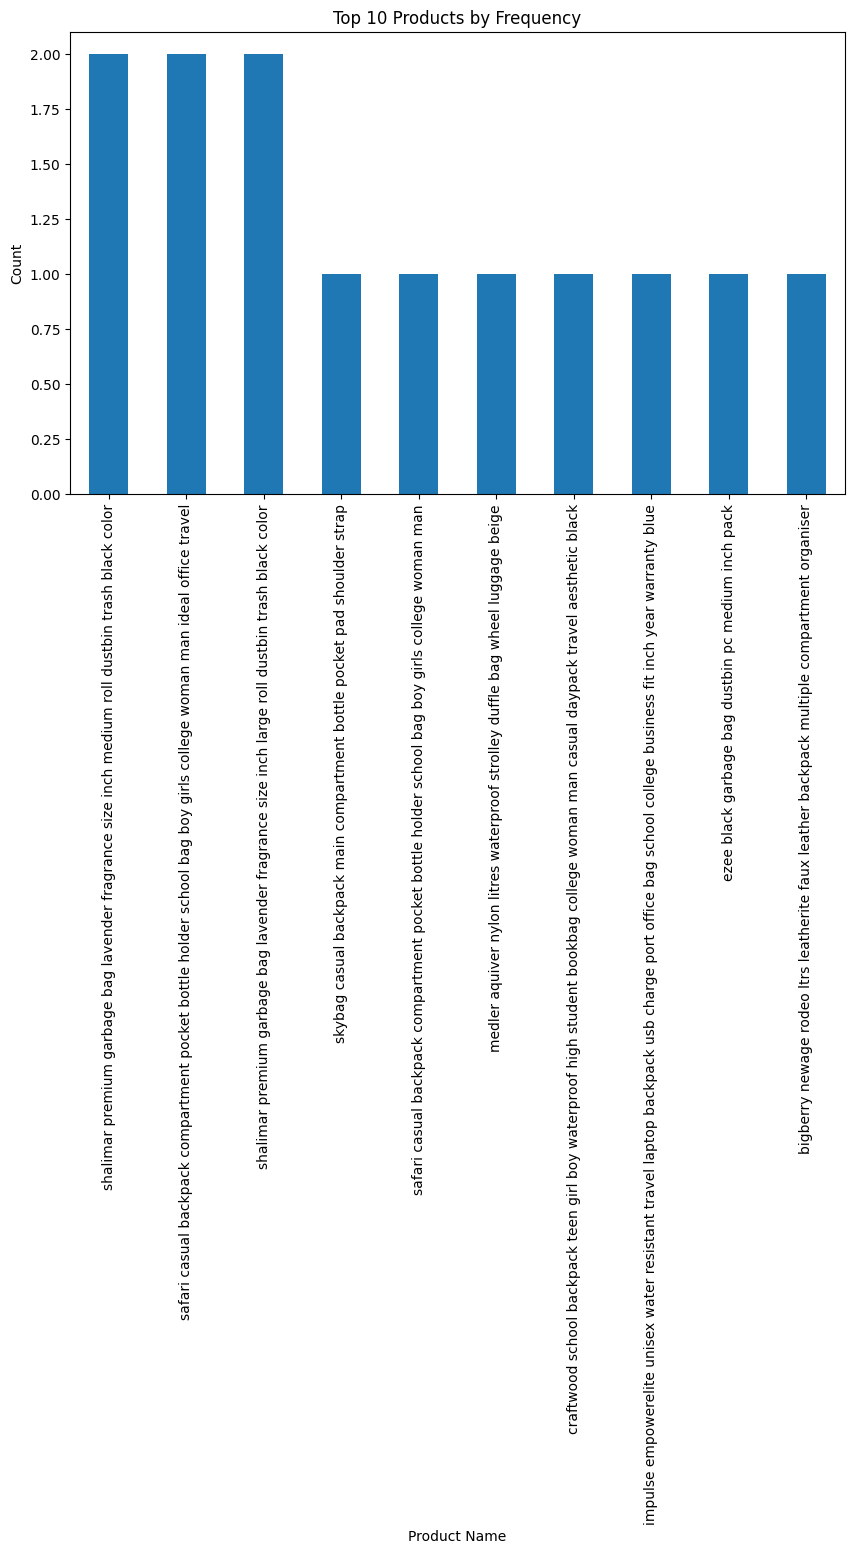

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')

plt.title('Top 10 Products by Frequency')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()


# 2 Word Frequency Analysis

In [47]:
from collections import Counter
all_words = ' '.join(df['product_name']).split()
# word_freq = Counter(all_words).most_common(10)
word_freq = Counter(all_words)
print(len(word_freq))
word_freq

557


Counter({'bag': 126,
         'backpack': 95,
         'laptop': 61,
         'inch': 56,
         'black': 55,
         'travel': 52,
         'woman': 51,
         'man': 43,
         'college': 41,
         'school': 39,
         'office': 35,
         'water': 32,
         'casual': 28,
         'resistant': 28,
         'size': 27,
         'garbage': 25,
         'pack': 25,
         'compartment': 24,
         'boy': 23,
         'girl': 23,
         'large': 23,
         'medium': 22,
         'blue': 21,
         'dustbin': 20,
         'roll': 20,
         'pocket': 18,
         'waterproof': 18,
         'cm': 18,
         'small': 17,
         'trash': 17,
         'color': 17,
         'cover': 17,
         'ltrs': 16,
         'premium': 16,
         'safari': 14,
         'polyester': 14,
         'unisex': 12,
         'duffle': 11,
         'luggage': 11,
         'business': 11,
         'storage': 11,
         'rain': 11,
         'shoulder': 10,
         'shalimar':

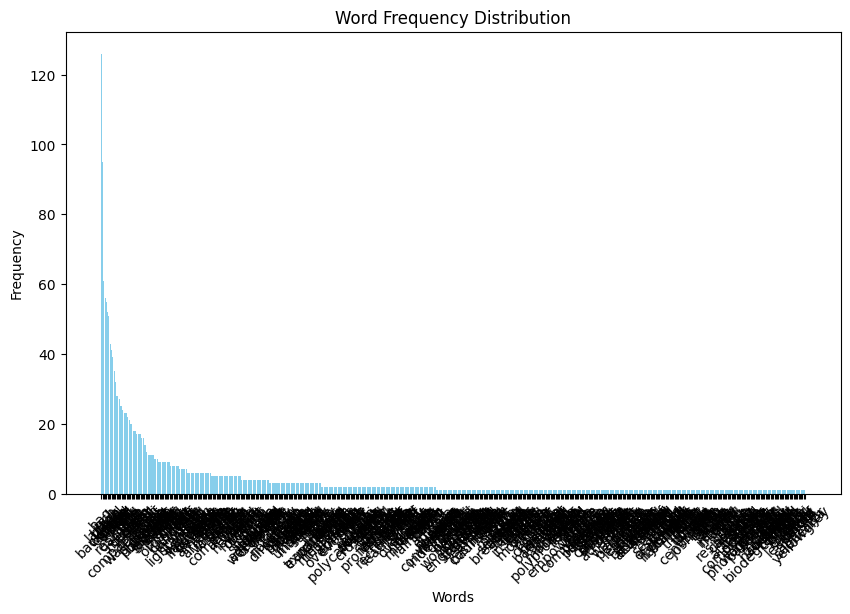

In [48]:
import matplotlib.pyplot as plt

# Create a DataFrame from word frequency
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['word'], word_freq_df['frequency'], color='skyblue')
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


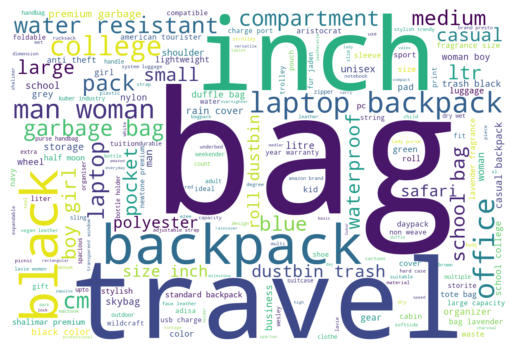

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(' '.join(df['product_name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


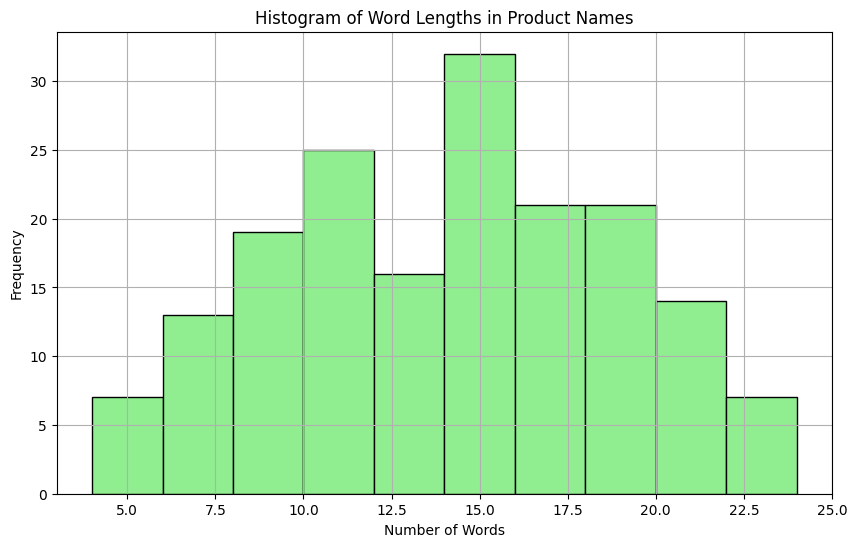

In [50]:
# Create a new column for word lengths
df['word_length'] = df['product_name'].apply(lambda x: len(x.split()))

# Plotting histogram
plt.figure(figsize=(10, 6))
df['word_length'].hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Word Lengths in Product Names')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to analyze n-grams
def get_ngrams(text_series, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_counts = vectorizer.fit_transform(text_series)
    ngram_sum = ngram_counts.sum(axis=0)
    ngrams = [(word, ngram_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngrams, key=lambda x: x[1], reverse=True)

# Bigrams and Trigrams
bigrams = get_ngrams(df['product_name'], 2)
trigrams = get_ngrams(df['product_name'], 3)

# Display the most common bigrams and trigrams
# Convert bigrams and trigrams to DataFrames
bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
trigrams_df = pd.DataFrame(trigrams, columns=['Trigram', 'Count'])

# Display the top 10 bigrams and trigrams
print("Top 10 Bigrams:")
display(bigrams_df.head(10))

print("Top 10 Trigrams:")
display(trigrams_df.head(10))

Top 10 Bigrams:


,Bigram,Count
0,laptop backpack,36
1,man woman,31
2,water resistant,27
3,garbage bag,24
4,school bag,19
5,dustbin trash,16
6,boy girl,15
7,size inch,14
8,roll dustbin,14
9,premium garbage,13


Top 10 Trigrams:


,Trigram,Count
0,roll dustbin trash,14
1,premium garbage bag,13
2,dustbin trash black,10
3,man woman boy,9
4,trash black color,9
5,woman boy girl,8
6,backpack office bag,7
7,shalimar premium garbage,7
8,laptop backpack office,6
9,laptop backpack black,6
